<a href="https://colab.research.google.com/github/viswambhar-yasa/Classification_cloths....../blob/main/Fashion_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries 
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
print('TensorFlow Version')
print(tf.__version__)

TensorFlow Version
2.5.0


### Importing dataset

In [6]:
(x_train,label_train),(x_test,label_test)=tfk.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Preview of the data

In [7]:
x_train.shape,label_train.shape

((60000, 28, 28), (60000,))

In [8]:
(m,nx,ny)=x_train.shape
print('Number of training examples',m)
print('The size of the image :(',nx,',',ny,')')
print('Total number of feature :',nx*ny)

Number of training examples 60000
The size of the image :( 28 , 28 )
Total number of feature : 784


Text(0.5, 1.0, '9')

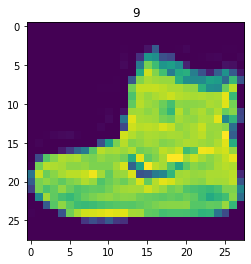

In [9]:
plt.imshow(x_train[0,:,:])
plt.title(label_train[0])

In [10]:
print('The labels')
labels={0:'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}
print(labels)

The labels
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [11]:
Y_train=tf.one_hot(label_train,9)

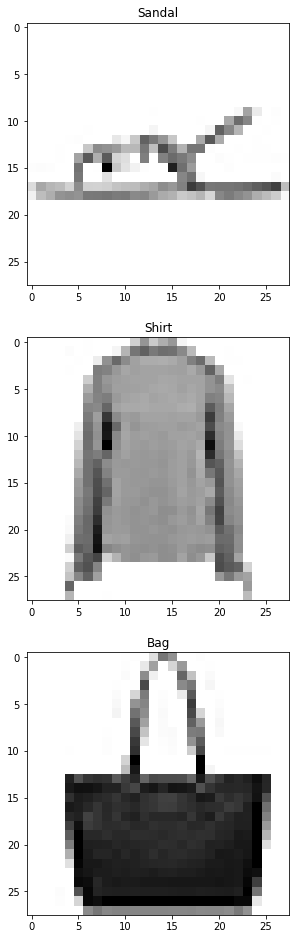

In [12]:
n=5
plt.figure(figsize=(28,28))
for i in range(1,n-1):
  plt.subplot(n, 1, i)
  j=np.random.randint(0,6000,1)
  plt.imshow(x_train[j[0],:,:],cmap=plt.cm.binary)
  plt.title(labels[label_train[j[0]]])

## Building deep Neural model

In [13]:
fashion_model0=tfk.Sequential([
    tfk.layers.Flatten(name='Flatten_layer'),
    tfk.layers.Dense(4,activation='relu',name='hidden_layer-1'),
    tfk.layers.Dense(10,activation='softmax',name='output_layer')
],name='Fashion_Model')

fashion_model0.compile(loss=tfk.losses.SparseCategoricalCrossentropy(),
                       optimizer=tfk.optimizers.Adam(learning_rate=0.01),
                       metrics=['accuracy'])

model_hist0=fashion_model0.fit(x_train,label_train,epochs=10,verbose=0)

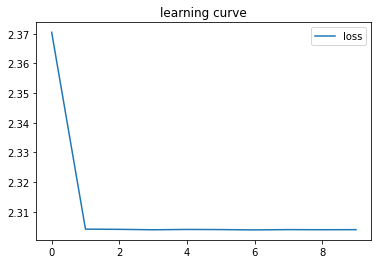

In [14]:
plt.plot(model_hist0.epoch,model_hist0.history['loss'],label='loss')
plt.title('learning curve')
plt.legend()

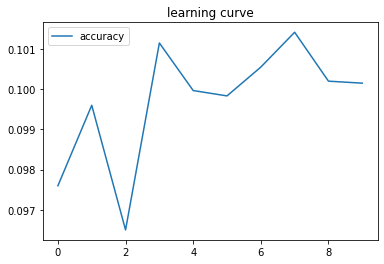

In [15]:
plt.plot(model_hist0.epoch,model_hist0.history["accuracy"],label='accuracy')
plt.title('learning curve')
plt.legend()

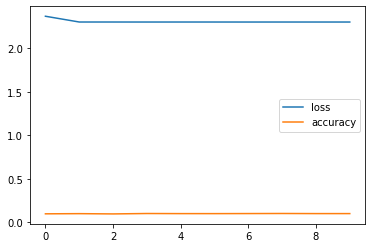

In [16]:
pd.DataFrame(model_hist0.history).plot()

### Improving model by performing Normalization

In [17]:
x_train.min(),x_train.max()

(0, 255)

In [18]:
x_train_scaled=x_train/225

In [19]:
fashion_model1=tfk.Sequential([
    tfk.layers.Flatten(name='Flatten_layer'),
    tfk.layers.Dense(50,activation='relu',name='hidden_layer-1'),
    tfk.layers.Dense(20,activation='relu',name='hidden_layer-2'),
    #tfk.layers.Dense(20,activation='relu',name='hidden_layer-3'),
    tfk.layers.Dense(10,activation='softmax',name='output_layer')
],name='Fashion_Model1')

fashion_model1.compile(loss=tfk.losses.SparseCategoricalCrossentropy(),
                       optimizer=tfk.optimizers.Adam(learning_rate=0.002),
                       metrics=['accuracy'])

model_hist1=fashion_model1.fit(x_train_scaled,label_train,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.8128
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8575
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3590 - accuracy: 0.8688
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8759
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3231 - accuracy: 0.8803
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8854
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.8877
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.8909
Epoch 9/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2881 - accuracy: 0.8937
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.282

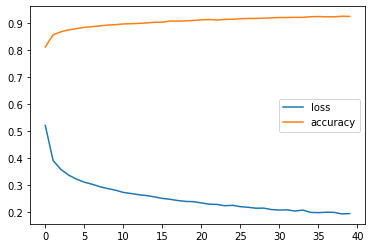

In [20]:
pd.DataFrame(model_hist1.history).plot()

In [21]:
x_test_scaled=x_test/225
fashion_model1.evaluate(x_test_scaled,label_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4384 - accuracy: 0.8724


[0.4383615255355835, 0.8723999857902527]

In [22]:
y_predicted=fashion_model1.predict(x_test_scaled)
y_predict=np.argmax(y_predicted.round(), axis=1)

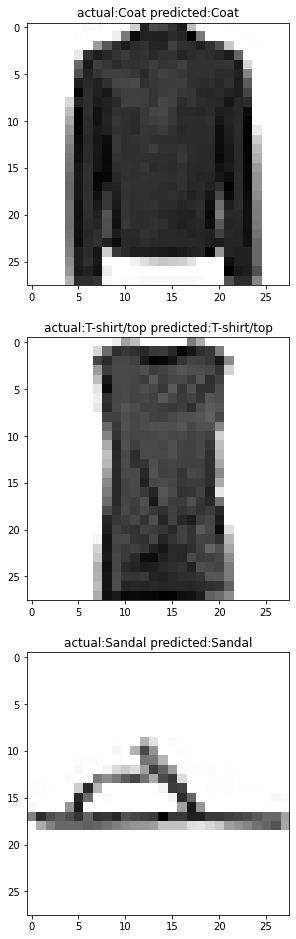

In [23]:
n=5
plt.figure(figsize=(28,28))
for i in range(1,n-1):
  plt.subplot(n, 1, i)
  j=np.random.randint(0,6000,1)
  plt.imshow(x_test[j[0],:,:],cmap=plt.cm.binary)
  plt.title('actual:'+labels[label_test[j[0]]]+' predicted:'+labels[y_predict[j[0]]])

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label_test,y_predict)
cm

array([[881,   3,  14,  17,   3,   2,  70,   0,  10,   0],
       [ 13, 975,   0,   7,   3,   0,   0,   0,   2,   0],
       [ 72,   2, 709,   8, 139,   1,  68,   0,   1,   0],
       [ 76,  42,   5, 795,  54,   1,  18,   0,   8,   1],
       [ 27,   0,  53,  14, 869,   0,  33,   0,   4,   0],
       [  2,   0,   0,   0,   0, 938,   0,  34,   1,  25],
       [199,   4,  65,  16,  90,   0, 616,   0,  10,   0],
       [  1,   0,   0,   0,   0,   8,   0, 950,   0,  41],
       [ 14,   1,   0,   2,   6,   1,   3,   5, 968,   0],
       [  1,   0,   1,   0,   0,   5,   1,  22,   0, 970]])

In [25]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

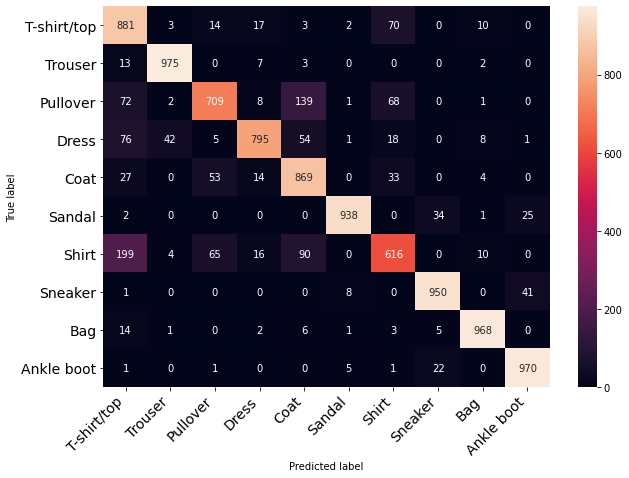

In [26]:
print_confusion_matrix(cm,list(labels.values()))